In [43]:
from ewatercycle_leakybucket.model import LeakyBucket
from ewatercycle.base.forcing import GenericLumpedForcing
import ewatercycle.observation.grdc
import ewatercycle.analysis
import ewatercycle.models
from pathlib import Path
from cartopy.io import shapereader
import pandas as pd
import numpy as np
from ewatercycle.container import ContainerImage

#shapefile that describes the basin we want to study.
shapeFile = "/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/AralSea_Basin/AralSeaBasin.shp"

#GRDC station ID for the observation station
grdc_station_id = "2617110"  # GRDC station ID
basin_name = "AMU DARYA"

#period of interest. Make sure that ERA5 is available on your machine for this period.
experiment_start_time="1990-01-01T00:00:00Z"
experiment_end_time="1995-12-31T00:00:00Z"

In [28]:
forcing = GenericLumpedForcing.generate(
    dataset='ERA5',
    start_time=experiment_start_time,
    end_time=experiment_end_time,
    shape=shapeFile
)

In [29]:

my_image = ContainerImage("/home/avandervee3/leakybucket_andre.sif")

model = LeakyBucket(forcing=forcing,
                    bmi_image=my_image)
cfg_file, _ = model.setup(leakiness=0.10)



In [30]:
model.initialize(cfg_file)

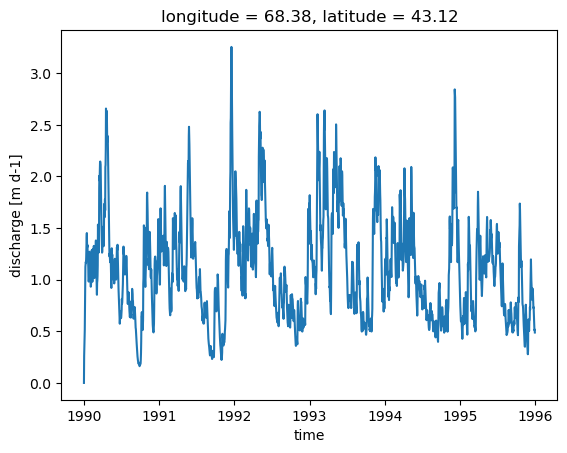

In [31]:


import xarray as xr

discharges = []
while model.time < model.end_time:
    discharges.append(model.get_value_as_xarray("discharge"))
    model.update()

discharge = xr.concat(discharges, dim="time")
discharge.plot()



In [32]:
discharge


<xarray.DataArray 'discharge' (time: 2190, latitude: 1, longitude: 1)> Size: 18kB
array([[[0.        ]],

       [[0.2596936 ]],

       [[0.33459284]],

       ...,

       [[0.51027654]],

       [[0.51745549]],

       [[0.48821446]]])
Coordinates:
  * longitude  (longitude) float64 8B 68.38
  * latitude   (latitude) float64 8B 43.12
  * time       (time) datetime64[ns] 18kB 1990-01-01T12:00:00 ... 1995-12-30T...
Attributes:
    units:    m d-1

In [33]:
df = discharge.to_dataframe(name="discharge").reset_index()

# df heeft nu kolommen: time, x, y, discharge (afhankelijk van je dimensies)
print(df.head())

                 time  latitude  longitude  discharge
0 1990-01-01 12:00:00    43.125     68.375   0.000000
1 1990-01-02 12:00:00    43.125     68.375   0.259694
2 1990-01-03 12:00:00    43.125     68.375   0.334593
3 1990-01-04 12:00:00    43.125     68.375   0.418964
4 1990-01-05 12:00:00    43.125     68.375   0.513641


In [39]:
from grpc4bmi.bmi_client_singularity import BmiClientSingularity

model = BmiClientSingularity('/home/avandervee3/leakybucket_henk.sif', work_dir='/tmp')
print(model.get_component_name())
del model

leakybucket_versie_henk


In [35]:

my_image_henk = ContainerImage("/home/avandervee3/leakybucket_henk.sif")

model_henk = LeakyBucket(forcing=forcing,
                    bmi_image=my_image_henk)
cfg_file_henk, _ = model_henk.setup(leakiness=0.10)

In [36]:
model_henk.initialize(cfg_file_henk)

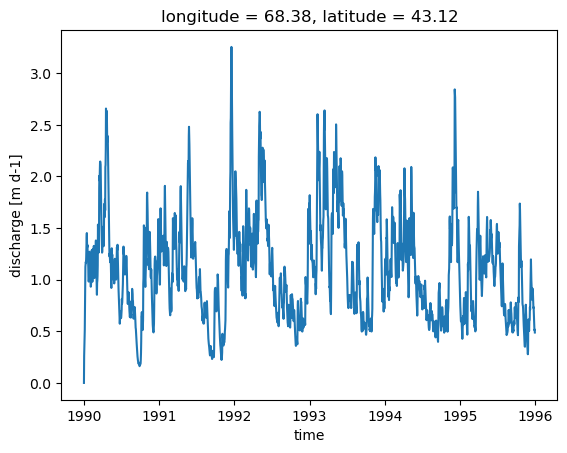

In [37]:


import xarray as xr

discharges_henk = []
while model_henk.time < model_henk.end_time:
    discharges_henk.append(model_henk.get_value_as_xarray("discharge"))
    model_henk.update()

discharges_henk = xr.concat(discharges_henk, dim="time")
discharges_henk.plot()



In [41]:
print(model_henk.bmi_client.get_component_name())

AttributeError: 'LeakyBucket' object has no attribute 'bmi_client'

In [44]:
print(ewatercycle.models.sources)

ModelSources[
    "HBV",
    "HBVLocal",
    "Hype",
    "LeakyBucket",
    "Lisflood",
    "MarrmotM01",
    "MarrmotM14",
    "PCRGlobWB",
    "Wflow",
    "WflowJl"
]
